# 📊CryptoScope: Unveiling Bitcoin Trends (2018–2025)

This project performs a **comprehensive analysis** of Bitcoin's price and trading activity from **January 2018 to September 2025** using **Python libraries**: NumPy, Pandas, Matplotlib, and Seaborn.

The analysis covers:
- Handling missing timestamps in high-frequency 15-minute interval data
- Exploratory Data Analysis (EDA) on price, volume, trades, and volatility
- Discovering seasonality, correlations, and anomalies
- Visualizing trends and trading patterns over time

## 📌 What I Did

1. **Loaded and Inspected the Dataset**       
   - Imported the Bitcoin CSV dataset using Pandas.
   - Previewed the first few rows and columns to understand data structure.

2. **Cleaned the Data**
   - Converted `Open time` and `Close time` to datetime format.
   - Removed extra spaces from column names.
   - Set `Open time` as the index and sorted the data.
   - Checked for duplicated timestamps and removed them.

3. **Handled Missing Timestamps**       
   - Generated a full 15-minute interval date range from 2018–2025.
   - Reindexed the dataset to match the full timeline.
   - Interpolated missing price and volume values using time-based and linear interpolation.
   - Recomputed `Close time` to maintain consistency.

4. **Exploratory Data Analysis (EDA)**
   - **Price Analysis:** plotted closing price, calculated 7-day and 30-day moving averages.
   - **Volatility Analysis:** computed daily returns, 30-day rolling volatility, high-low price spreads.
   - **Volume & Trades:** analyzed trading volume trends, number of trades over time, and spikes.
   - **Seasonality Patterns:** studied hour-of-day, day-of-week, and monthly trading activity.
   - **Correlation Analysis:** examined relationships between price, volume, trades, and taker buy volume.
   - **Anomaly Detection:** identified top crash and rally days.

5. **Visualizations**
   - Line plots for price trends and moving averages.
   - Rolling volatility charts.
   - Heatmaps for correlation and trading volume patterns.
   - Scatterplots for volume vs returns and taker buy ratios.
   - Histograms and boxplots for returns distribution.

6. **Derived Insights**
   - Tracked and labeled market upturns and downturns.
   - Recognized periods of high volatility and risk.
   - Observed trading adoption trends through number of trades.
   - Determined correlations between volume spikes, taker buy activity, and price movements.
   - Highlighted extreme market events and anomalies.




In [33]:
import pandas as pd
df=pd.read_csv('bitcoin_data.csv')
df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2018-01-01 00:00:00.000000,13715.65,13715.65,13400.01,13556.15,123.616013,2018-01-01 00:14:59.999000,1.675545e+06,1572,63.227133,8.576108e+05,0
1,2018-01-01 00:15:00.000000,13533.75,13550.87,13402.00,13521.12,98.136430,2018-01-01 00:29:59.999000,1.321757e+06,1461,47.686389,6.422812e+05,0
2,2018-01-01 00:30:00.000000,13500.00,13545.37,13450.00,13470.41,79.904037,2018-01-01 00:44:59.999000,1.078825e+06,1000,43.710406,5.900347e+05,0
3,2018-01-01 00:45:00.000000,13494.65,13690.87,13450.00,13529.01,141.699719,2018-01-01 00:59:59.999000,1.917783e+06,1195,73.897993,1.000614e+06,0
4,2018-01-01 01:00:00.000000,13528.99,13571.74,13402.28,13445.63,72.537533,2018-01-01 01:14:59.999000,9.778198e+05,898,34.257652,4.618369e+05,0


I load the dataset and inspect its first few rows to understand columns and data types.

## 🧹 Data Cleaning: Timestamps & Column Formatting

- Converted `Open time` and `Close time` columns to **datetime** objects for accurate time-based analysis.  
- Stripped extra spaces from column names to avoid issues when referencing columns.  
- Set `Open time` as the **index** of the DataFrame to facilitate **time series analysis** and sorting.  
- Verified the index name to ensure proper data alignment.



In [34]:
df['Open time']=pd.to_datetime(df['Open time'])
df['Close time']=pd.to_datetime(df['Close time'])

In [36]:
df.dtypes

Open time                       datetime64[ns]
Open                                   float64
High                                   float64
Low                                    float64
Close                                  float64
Volume                                 float64
Close time                      datetime64[ns]
Quote asset volume                     float64
Number of trades                         int64
Taker buy base asset volume            float64
Taker buy quote asset volume           float64
Ignore                                   int64
dtype: object

In [37]:
df.columns = df.columns.str.strip() 
df.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Ignore'],
      dtype='object')

In [38]:
df.set_index('Open time',inplace=True)

In [39]:
print(df.index.name)

Open time


In [40]:
print(df.index.min())
print(df.index.max())


2018-01-01 00:00:00
2025-09-04 23:15:00


In [41]:
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='15min')
print(full_index)

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:15:00',
               '2018-01-01 00:30:00', '2018-01-01 00:45:00',
               '2018-01-01 01:00:00', '2018-01-01 01:15:00',
               '2018-01-01 01:30:00', '2018-01-01 01:45:00',
               '2018-01-01 02:00:00', '2018-01-01 02:15:00',
               ...
               '2025-09-04 21:00:00', '2025-09-04 21:15:00',
               '2025-09-04 21:30:00', '2025-09-04 21:45:00',
               '2025-09-04 22:00:00', '2025-09-04 22:15:00',
               '2025-09-04 22:30:00', '2025-09-04 22:45:00',
               '2025-09-04 23:00:00', '2025-09-04 23:15:00'],
              dtype='datetime64[ns]', length=269182, freq='15min')


## 🔍 Identify Missing and Duplicate Timestamps

- Calculated the **expected number of rows** based on 15-minute intervals from the start to the end of the dataset.  
- Compared with the **actual number of rows** to check for:  
  1. **Missing timestamps** — intervals that were skipped in the dataset.  
  2. **Duplicate rows** — repeated timestamps that could distort analysis.  
- Used `difference` to identify **which timestamps are missing**.  
- Displayed the **count and a sample of missing timestamps**.  
- Handling duplicates and missing timestamps ensures the **time series is continuous, clean, and ready for interpolation**.


In [42]:
print("Expected", len(full_index))
print("Actual", len(df))
print("Missing", len(full_index) - len(df))

Expected 269182
Actual 268653
Missing 529


In [43]:
missing_ts = full_index.difference(df.index)
missing_ts

DatetimeIndex(['2018-01-04 03:15:00', '2018-01-04 03:30:00',
               '2018-01-04 03:45:00', '2018-01-04 04:00:00',
               '2018-01-04 04:15:00', '2018-01-04 04:30:00',
               '2018-01-04 04:45:00', '2018-02-08 00:30:00',
               '2018-02-08 00:45:00', '2018-02-08 01:00:00',
               ...
               '2021-09-29 07:45:00', '2021-09-29 08:00:00',
               '2021-09-29 08:15:00', '2021-09-29 08:30:00',
               '2021-09-29 08:45:00', '2023-03-24 12:45:00',
               '2023-03-24 13:00:00', '2023-03-24 13:15:00',
               '2023-03-24 13:30:00', '2023-03-24 13:45:00'],
              dtype='datetime64[ns]', length=532, freq=None)

In [44]:
print("Missing count:", len(missing_ts))

Missing count: 532


In [45]:
print("Sample missing:", missing_ts[:20])

Sample missing: DatetimeIndex(['2018-01-04 03:15:00', '2018-01-04 03:30:00',
               '2018-01-04 03:45:00', '2018-01-04 04:00:00',
               '2018-01-04 04:15:00', '2018-01-04 04:30:00',
               '2018-01-04 04:45:00', '2018-02-08 00:30:00',
               '2018-02-08 00:45:00', '2018-02-08 01:00:00',
               '2018-02-08 01:15:00', '2018-02-08 01:30:00',
               '2018-02-08 01:45:00', '2018-02-08 02:00:00',
               '2018-02-08 02:15:00', '2018-02-08 02:30:00',
               '2018-02-08 02:45:00', '2018-02-08 03:00:00',
               '2018-02-08 03:15:00', '2018-02-08 03:30:00'],
              dtype='datetime64[ns]', freq=None)


##  Remove Duplicates & Reindex Dataset

- Removed **duplicate rows** based on the index (`Open time`) to ensure **each timestamp is unique**.  
  - `keep='first'` keeps the first occurrence of a duplicate and drops the rest.  
- **Reindexed the DataFrame** using the full 15-minute interval timeline (`full_index`) to include any previously missing timestamps.  
- After this step, the dataset has a **continuous time series** with no duplicates, ready for **interpolation and analysis**.


In [46]:
df = df[~df.index.duplicated(keep='first')]

In [47]:
df = df.reindex(full_index)
df

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
2018-01-01 00:00:00,13715.65,13715.65,13400.01,13556.15,123.616013,2018-01-01 00:14:59.999,1.675545e+06,1572.0,63.227133,8.576108e+05,0.0
2018-01-01 00:15:00,13533.75,13550.87,13402.00,13521.12,98.136430,2018-01-01 00:29:59.999,1.321757e+06,1461.0,47.686389,6.422812e+05,0.0
2018-01-01 00:30:00,13500.00,13545.37,13450.00,13470.41,79.904037,2018-01-01 00:44:59.999,1.078825e+06,1000.0,43.710406,5.900347e+05,0.0
2018-01-01 00:45:00,13494.65,13690.87,13450.00,13529.01,141.699719,2018-01-01 00:59:59.999,1.917783e+06,1195.0,73.897993,1.000614e+06,0.0
2018-01-01 01:00:00,13528.99,13571.74,13402.28,13445.63,72.537533,2018-01-01 01:14:59.999,9.778198e+05,898.0,34.257652,4.618369e+05,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2025-09-04 22:15:00,110552.00,110896.90,110526.60,110823.61,127.483180,2025-09-04 22:29:59.999,1.411577e+07,20201.0,71.739330,7.942705e+06,0.0
2025-09-04 22:30:00,110823.60,110958.25,110760.00,110760.00,119.650720,2025-09-04 22:44:59.999,1.326584e+07,15291.0,43.285590,4.799464e+06,0.0
2025-09-04 22:45:00,110760.00,111588.66,110738.70,111490.73,361.096370,2025-09-04 22:59:59.999,4.016889e+07,45840.0,223.562010,2.486103e+07,0.0
2025-09-04 23:00:00,111490.74,111765.31,111345.18,111412.63,410.795990,2025-09-04 23:14:59.999,4.583974e+07,55122.0,181.031080,2.020003e+07,0.0


## 🔄 Interpolate Missing Values

- Separated columns into **price-related** (`Open`, `High`, `Low`, `Close`) and **volume-related** metrics.  
- **Price columns**: interpolated using **time-based interpolation** to maintain continuity in Bitcoin price trends.  
- **Volume columns**: interpolated using **linear interpolation** and rounded, since volume and number of trades are discrete quantities.  
- After this step, the dataset has **no missing values**, making it ready for analysis and visualization.


In [48]:
price_cols = ['Open', 'High', 'Low', 'Close']
vol_cols   = ['Volume', 'Quote asset volume', 'Number of trades',
              'Taker buy base asset volume', 'Taker buy quote asset volume']

In [49]:
df[price_cols] = df[price_cols].interpolate(method='time')

In [50]:
df[vol_cols]   = df[vol_cols].interpolate(method='linear').round()

In [61]:
df

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
2018-01-01 00:00:00,13715.65,13715.65,13400.01,13556.15,124.0,2018-01-01 00:14:59.999,1675545.0,1572.0,63.0,857611.0,0.0
2018-01-01 00:15:00,13533.75,13550.87,13402.00,13521.12,98.0,2018-01-01 00:29:59.999,1321757.0,1461.0,48.0,642281.0,0.0
2018-01-01 00:30:00,13500.00,13545.37,13450.00,13470.41,80.0,2018-01-01 00:44:59.999,1078825.0,1000.0,44.0,590035.0,0.0
2018-01-01 00:45:00,13494.65,13690.87,13450.00,13529.01,142.0,2018-01-01 00:59:59.999,1917783.0,1195.0,74.0,1000614.0,0.0
2018-01-01 01:00:00,13528.99,13571.74,13402.28,13445.63,73.0,2018-01-01 01:14:59.999,977820.0,898.0,34.0,461837.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2025-09-04 22:15:00,110552.00,110896.90,110526.60,110823.61,127.0,2025-09-04 22:29:59.999,14115774.0,20201.0,72.0,7942705.0,0.0
2025-09-04 22:30:00,110823.60,110958.25,110760.00,110760.00,120.0,2025-09-04 22:44:59.999,13265841.0,15291.0,43.0,4799464.0,0.0
2025-09-04 22:45:00,110760.00,111588.66,110738.70,111490.73,361.0,2025-09-04 22:59:59.999,40168887.0,45840.0,224.0,24861029.0,0.0
2025-09-04 23:00:00,111490.74,111765.31,111345.18,111412.63,411.0,2025-09-04 23:14:59.999,45839738.0,55122.0,181.0,20200033.0,0.0


## 🗑️ Drop Unnecessary Columns

- Dropped the `Ignore` column as it **does not contain useful information** for analysis.  
- After removing this column, the dataset now contains only **relevant features** for price, volume, trades, and taker buy activity.  
- Verified column names to ensure the dataset is clean and ready for further analysis.


In [51]:
df.drop('Ignore', axis=1, inplace=True)

In [52]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume'],
      dtype='object')

## ⏱️ Recalculate Close Time & Final Data Verification

- **Recomputed `Close time`** by adding 15 minutes to the `Open time` index and subtracting 1 millisecond to maintain precise 15-minute intervals.  
- Verified that **no missing values remain** after this adjustment.  
- Checked **data types** to ensure all columns are in the correct format for analysis.  
- Displayed the first few rows to confirm that the dataset is **clean, complete, and ready for EDA**.


In [53]:
print(df.isna().sum())   


Open                              0
High                              0
Low                               0
Close                             0
Volume                            0
Close time                      532
Quote asset volume                0
Number of trades                  0
Taker buy base asset volume       0
Taker buy quote asset volume      0
dtype: int64


In [54]:
df['Close time'] = df.index + pd.Timedelta(minutes=15) - pd.Timedelta(milliseconds=1)


In [55]:
print(df.isna().sum())

Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
dtype: int64


In [56]:
df.dtypes

Open                                   float64
High                                   float64
Low                                    float64
Close                                  float64
Volume                                 float64
Close time                      datetime64[ns]
Quote asset volume                     float64
Number of trades                       float64
Taker buy base asset volume            float64
Taker buy quote asset volume           float64
dtype: object

In [57]:
df.head()

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
2018-01-01 00:00:00,13715.65,13715.65,13400.01,13556.15,124.0,2018-01-01 00:14:59.999,1675545.0,1572.0,63.0,857611.0
2018-01-01 00:15:00,13533.75,13550.87,13402.00,13521.12,98.0,2018-01-01 00:29:59.999,1321757.0,1461.0,48.0,642281.0
2018-01-01 00:30:00,13500.00,13545.37,13450.00,13470.41,80.0,2018-01-01 00:44:59.999,1078825.0,1000.0,44.0,590035.0
2018-01-01 00:45:00,13494.65,13690.87,13450.00,13529.01,142.0,2018-01-01 00:59:59.999,1917783.0,1195.0,74.0,1000614.0
2018-01-01 01:00:00,13528.99,13571.74,13402.28,13445.63,73.0,2018-01-01 01:14:59.999,977820.0,898.0,34.0,461837.0


## 📈 Bitcoin Daily Closing Price Trend

- Plotted the **daily closing price** of Bitcoin from 2018 to 2025.  
- This **line chart** provides a visual overview of **long-term price trends**, including bull and bear market periods.  
- Helps identify major price surges, dips, and overall market behavior over time.



In [58]:
import matplotlib.pyplot as plt
import seaborn as sns


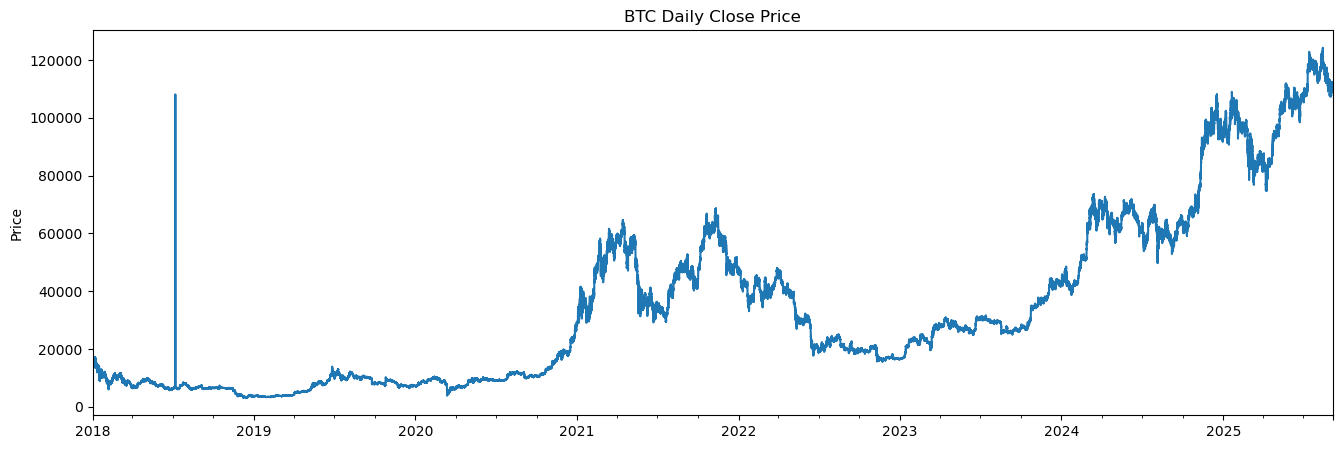

In [61]:
df['Close'].plot(figsize=(16,5), title='BTC Daily Close Price')
plt.ylabel('Price')
plt.show()

**INSIGHTS**  
- **Observation:** Bitcoin’s daily closing prices display distinct **bull and bear market cycles**.  
- **Notable Peaks:** Significant price **advances** in **late 2017**, **2021**, and **2025**, followed by notable **downturns**.  
- **Interpretation:** Reinforces Bitcoin’s nature as a highly **cyclical and volatile asset**, characterized by recurring **expansion and contraction phases**.  


## 📊 Moving Averages (7-day & 30-day)

- Calculated **7-day** and **30-day moving averages (MA)** on the Bitcoin closing price.  
- Moving averages help **smooth out short-term fluctuations** and highlight broader price trends.  
- **7-day MA** → captures short-term momentum.  
- **30-day MA** → highlights long-term market direction.  
- The overlay of MAs with the daily close price helps to identify **bullish crossovers (short-term above long-term)** and **bearish crossovers (short-term below long-term)**, which are widely used signals in trading analysis.


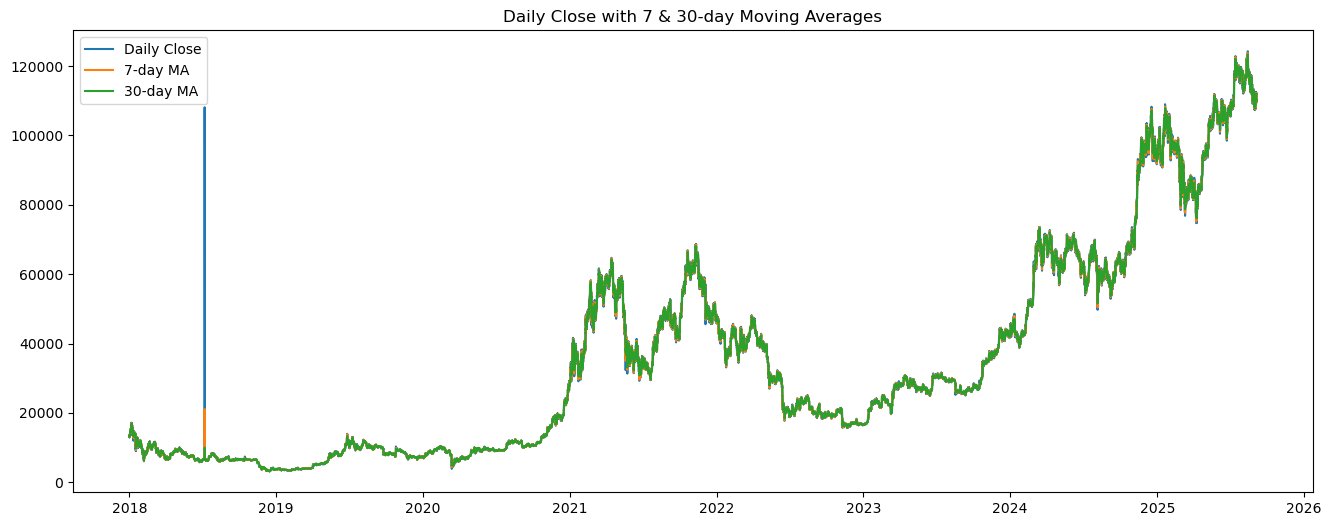

In [63]:
df['ma_7d'] = df['Close'].rolling(7).mean()
df['ma_30d'] = df['Close'].rolling(30).mean()

plt.figure(figsize=(16,6))
plt.plot(df['Close'], label='Daily Close')
plt.plot(df['ma_7d'], label='7-day MA')
plt.plot(df['ma_30d'], label='30-day MA')
plt.title('Daily Close with 7 & 30-day Moving Averages')
plt.legend()
plt.show()

**INSIGHTS**
- **Observation:** The **7-day MA** reflects short-term swings, while the **30-day MA** captures the broader long-term trend.  
- **Interpretation:** **Crossovers** between the short-term and long-term averages signal **momentum shifts**.  
  - **Bullish crossover:** 7-day MA rises above the 30-day MA → potential **uptrend**.  
  - **Bearish crossover:** 7-day MA falls below the 30-day MA → potential **downtrend**.  
 


## 📉 Rolling Volatility (30-day)

- Calculated **daily returns** using the formula: `(Close - Previous Close) / Previous Close`.  
- Computed **30-day rolling volatility** as the standard deviation of daily returns, multiplied by 100 to express as a percentage.  
- The **rolling volatility chart** helps identify periods of **high risk and market instability**.  
- Peaks in volatility often coincide with **major price swings**, highlighting the market’s risk dynamics over time.


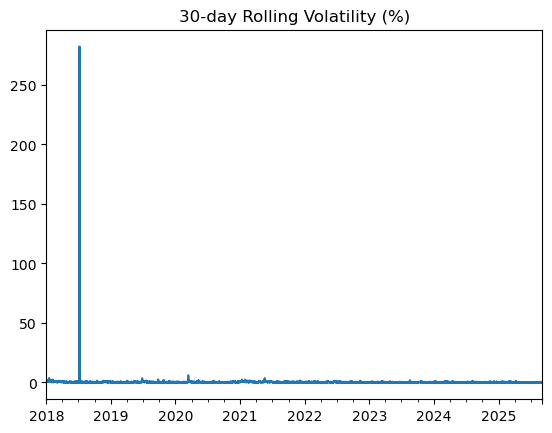

In [66]:
df['return'] = df['Close'].pct_change()
df['vol_30d'] = df['return'].rolling(30).std() * 100
df['vol_30d'].plot(title='30-day Rolling Volatility (%)')
plt.show()


**INSIGHTS**  
- **Observation:** Volatility reached elevated levels during **major events** such as the **COVID-19 market crash (2020)** and the **2021 bull market**.  
- **Interpretation:** Elevated volatility reflects both **heightened trading opportunities** and **greater risk exposure**.  
- **Use Case:** Monitoring volatility assists traders and risk managers in **adjusting position sizes**, adopting **protective measures** , and preparing for **uncertain market conditions**.  


## ⏰ Average Trading Volume by Hour

- Extracted the **hour** from the timestamp to analyze **intraday trading patterns**.  
- Grouped by hour and calculated the **average trading volume**.  
- Plotted to identify **hours with highest Bitcoin trading activity**.  
- Helps understand **market behavior throughout the day**, e.g., overlaps with major global trading sessions.  
- Useful for traders to **time trades** or detect periods of increased liquidity.


In [70]:
df['hour'] = df.index.hour
df['dow'] = df.index.day_name()
df['month'] = df.index.month

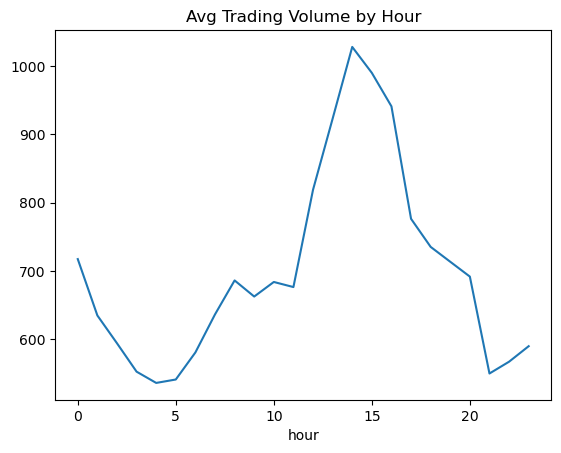

In [71]:
hour_vol = df.groupby('hour')['Volume'].mean()
hour_vol.plot(title='Avg Trading Volume by Hour')
plt.show()

**INSIGHTS**
- **Observation:** Trading activity **peaks during US and European market hours**, reflecting concentrated global activity.  
- **Interpretation:** Despite being a 24/7 market, Bitcoin trading is still influenced by **traditional financial market sessions**.  
- **Use Case:** Traders can leverage this insight to **time trades** during periods of **higher liquidity** and **tighter spreads**.  


## 📊 Heatmap: Average Volume by Day and Hour

- Created a **pivot table** with **day of the week** as rows and **hour of the day** as columns, aggregating **average trading volume**.  
- Reordered the days from Monday to Sunday for clarity.  
- Plotted a **heatmap** to visualize trading activity patterns across the week and intraday hours.  
- Helps identify **peak market activity periods** and patterns in **Bitcoin trading behavior



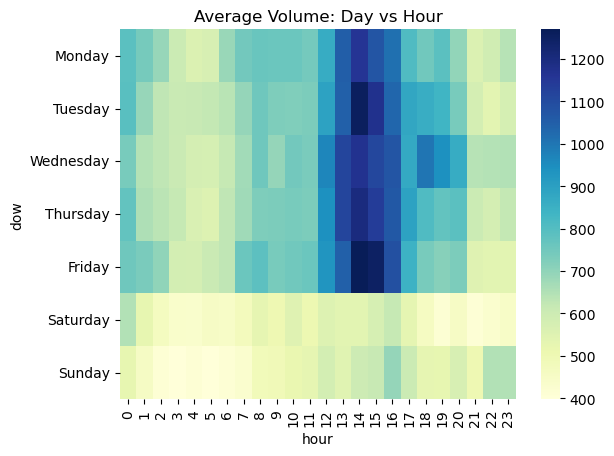

In [72]:
pivot = df.pivot_table(index='dow', columns='hour', values='Volume', aggfunc='mean')
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot = pivot.reindex(order)
sns.heatmap(pivot, cmap='YlGnBu').set_title('Average Volume: Day vs Hour')
plt.show()

**INSIGHTS**  
- **Observation:** Specific **days and intraday hours** exhibit consistently **higher trading volumes**, often influenced by **institutional activity** or **market-moving news**.  
- **Interpretation:** Despite operating 24/7, the crypto market demonstrates **concentrated activity patterns**, with liquidity clustering around particular **weekday and hourly windows**.  
- **Use Case:** Enables traders to **optimize trade execution** and allows analysts to better understand **liquidity dynamics** across different periods.  


## 📏 30-day Rolling High-Low Range

- Calculated the **daily price range** as `High - Low` to measure **intraday volatility**.  
- Computed a **30-day rolling average** of this range to smooth short-term fluctuations.  
- Plotted the **rolling high-low range** to identify periods of increased market volatility.  
- Helps highlight **risky periods**, sudden price swings, and potential trading opportunities.


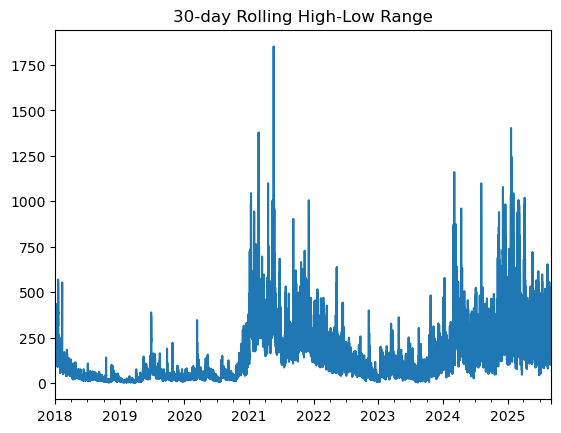

In [78]:
df['range'] = df['High'] - df['Low']
df['range'].rolling(30).mean().plot(title='30-day Rolling High-Low Range')
plt.show()


**INSIGHTS**
- **Observation:** The chart shows **wild price swings** with **sharp spikes** in the rolling high–low range.  
- **Interpretation:** Bitcoin frequently experiences **extreme intraday moves**, not just volatility in closing prices.  
- **Use Case:** Monitoring the high–low range helps traders anticipate **short-term risk**, spot **breakouts**, and adjust **stop-loss strategies**.  


## 📊 Volume vs |Daily Return|

- Calculated the **absolute daily return** to measure the magnitude of price changes regardless of direction.  
- Sampled 1,000 points for clarity and plotted **Volume vs |Daily Return|** using a scatter plot.  
- Helps identify whether **large trading volumes are associated with bigger price swings**.  
- Can reveal **liquidity-driven volatility** or periods when market activity leads to significant price movements.


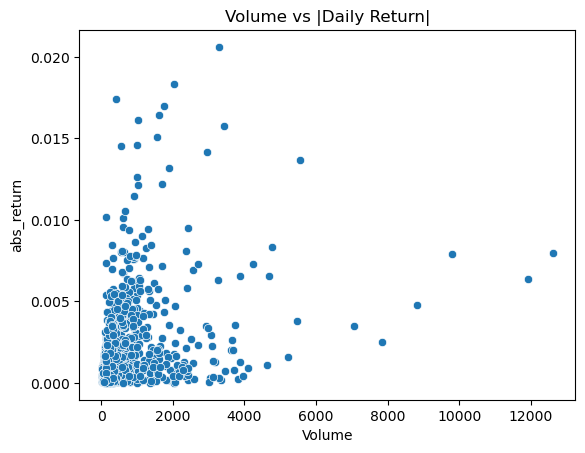

In [79]:
df['abs_return'] = df['return'].abs()
sns.scatterplot(x='Volume', y='abs_return', data=df.sample(1000, random_state=1))
plt.title('Volume vs |Daily Return|')
plt.show()

**INSIGHTS**
- **Observation:** The scatter plot shows a **weak relationship** — large price swings don’t always coincide with high trading volume.  
- **Interpretation:** Significant **crashes or rallies** can occur even during periods of **moderate volume**, suggesting other drivers like **market sentiment** or **external news**.  
- **Use Case:** Useful for assessing whether **liquidity** drives volatility, or if **external shocks** dominate price action.  


## 🔗 Correlation Between Volume and Absolute Daily Return

- Calculated the **Pearson correlation** between `Volume` and `abs_return`.  
- Helps quantify the **relationship between trading volume and price volatility**.  
- A positive correlation indicates that **higher trading volumes tend to coincide with larger price swings**, while a low or negative correlation suggests weaker or inverse relationships.  
- This insight is important for understanding **market dynamics and liquidity-driven volatility**.


In [80]:
df[['Volume','abs_return']].corr()


,Volume,abs_return
Volume,1.000000,0.035895
abs_return,0.035895,1.000000


**INSIGHTS**  
- **Observation:** The Pearson correlation is around **0.036**, indicating a **very weak link** between trading volume and price volatility.  
- **Interpretation:** Bitcoin’s price swings are driven more by **market sentiment** and **external shocks** than by raw trading volume alone.  
- **Use Case:** Reinforces that **volume analysis alone** is insufficient — traders should combine it with **sentiment, news, and macro factors** to understand volatility.  


## 🛠️ Daily Number of Trades

- Plotted the **daily number of trades** to observe Bitcoin trading activity over time.  
- Helps identify **trends in market adoption** — an increasing number of trades can indicate growing interest and liquidity.  
- Peaks may coincide with **major market events or news**, while low periods can indicate quieter market phases.


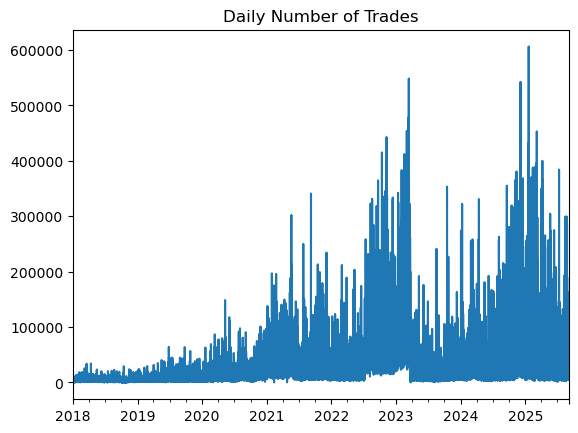

In [81]:
df['Number of trades'].plot(title='Daily Number of Trades')
plt.show()


**INSIGHTS**

- **Observation:** The daily number of trades increases during high-volatility periods.  
- **Interpretation:** Market participation rises when uncertainty or price swings are high, reflecting heightened investor activity. Peaks often align with major market events or news, while quieter periods indicate lower trading activity and reduced market attention.


## 📈 Daily Returns Distribution

- Plotted a **histogram with KDE** of daily returns to analyze the **distribution of Bitcoin price changes**.  
- Limited the x-axis to `-0.2` to `0.2` for better visibility of most daily movements.  
- Helps identify **risk characteristics**, such as **heavy tails** (extreme losses or gains) and **volatility**


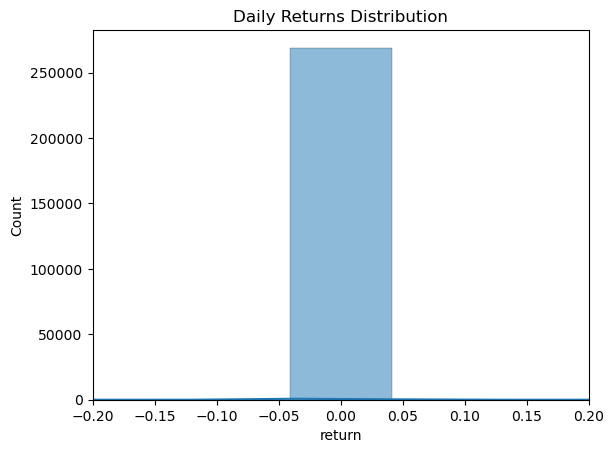

In [ ]:
sns.histplot(df['return'].dropna(), bins=200, kde=True)
plt.xlim(-0.2, 0.2)
plt.title('Daily Returns Distribution')
plt.show()

**INSIGHTS**
- **Observation:** The distribution shows **fat tails**, meaning extreme **gains and losses occur more frequently** than in a normal distribution.  
- **Interpretation:** Bitcoin is prone to **large shocks** and behaves unlike traditional normal assets, reflecting its **high-risk, high-reward profile**.  
- **Use Case:** Useful for **risk management** — standard models assuming normality may **underestimate tail risk** in crypto markets.  


## 📦 Daily Returns Distribution by Year

- Plotted a **boxplot** of daily returns grouped by year to analyze **yearly volatility patterns**.  
- Highlights **median, interquartile range (IQR), and outliers** for each year.  
- Helps identify **particularly volatile years**, crash periods, or extreme rallies.  
- Useful for understanding **how Bitcoin’s risk profile changes over time**.


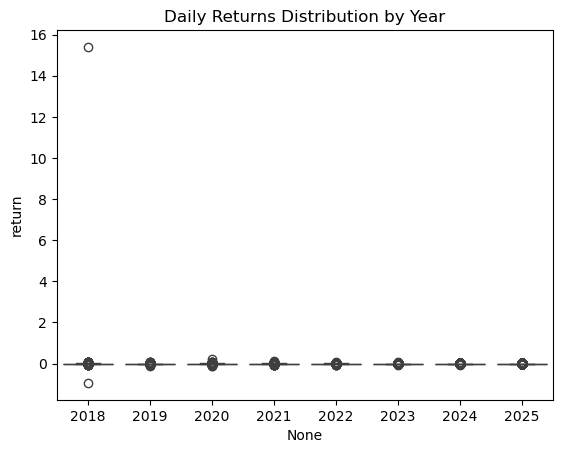

In [82]:
sns.boxplot(x=df.index.year, y=df['return'])
plt.title('Daily Returns Distribution by Year')
plt.show()


**INSIGHTS**
- **Observation:** Years like **2020 and 2021** show **higher dispersion** of returns, reflecting exceptional volatility. More recent years remain volatile but are **slightly more contained**.  
- **Interpretation:** Bitcoin’s **risk profile evolves year to year**, with some periods dominated by extreme uncertainty and others showing relative stability.  
- **Use Case:** Helps investors understand **shifting volatility regimes**, aiding in **long-term portfolio risk planning**.  


## 🪙 Taker Buy Ratio vs Daily Return

- Calculated the **Taker Buy Ratio** as `Taker buy base asset volume / Volume`.  
- Sampled 1,000 points and plotted a **scatter plot** against daily returns.  
- Helps investigate whether **buying activity by takers influences price movement**.  
- Insights can reveal **market sentiment and directional pressure** from aggressive buyers in the market.


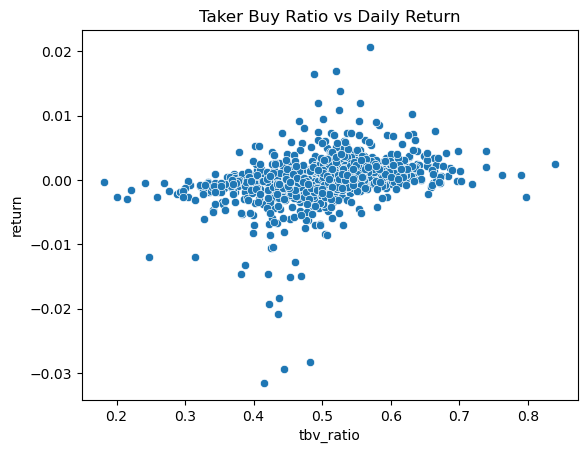

In [83]:
df['tbv_ratio'] = df['Taker buy base asset volume'] / df['Volume']
sns.scatterplot(x='tbv_ratio', y='return', data=df.sample(1000, random_state=2))
plt.title('Taker Buy Ratio vs Daily Return')
plt.show()

**INSIGHTS**
- **Observation:** The scatter plot shows **no strong trend** between the Taker Buy Ratio and daily returns.  
- **Interpretation:** Market direction is **not purely driven by taker-side activity** — other factors such as **macro events, sentiment, and liquidity** play larger roles.  
- **Use Case:** Helps confirm that **order flow alone** cannot reliably predict returns, emphasizing the need for **multi-factor analysis**.  


## 🔗 Correlation: Taker Buy Ratio vs Daily Return

- Calculated the **Pearson correlation** between `tbv_ratio` and `return`.  
- Helps quantify whether **higher taker buy activity is associated with price increases**.  
- A positive correlation indicates that **more aggressive buying by takers tends to push prices up**, while a negative correlation suggests the opposite.  
- This insight is useful for understanding **market dynamics and trader behavior** in Bitcoin trading.


In [84]:
df[['tbv_ratio','return']].corr()

,tbv_ratio,return
tbv_ratio,1.000000,0.041033
return,0.041033,1.000000


**INSIGHTS**
- **Observation:** The Pearson correlation is approximately **0**, indicating **no meaningful relationship** between taker buy activity and returns.  
- **Interpretation:** **Buy/sell imbalances alone** do not reliably predict price movements — market dynamics are influenced by broader **sentiment, liquidity, and external factors**.  
- **Use Case:** Highlights the limitation of relying solely on **taker flow metrics** for forecasting returns.  


##  Correlation Matrix of Key Features

- Selected important features: `Open`, `Close`, `Volume`, `Number of trades`, and `Taker buy base asset volume`.  
- Plotted a **heatmap of their Pearson correlations** using Seaborn.  
- Helps visualize **relationships between price, volume, trading activity, and taker buy activity**.  
- Can identify which factors are **strongly correlated** and may influence Bitcoin price behavior.  
- Aids in **insight-driven analysis** and potential predictive modeling.


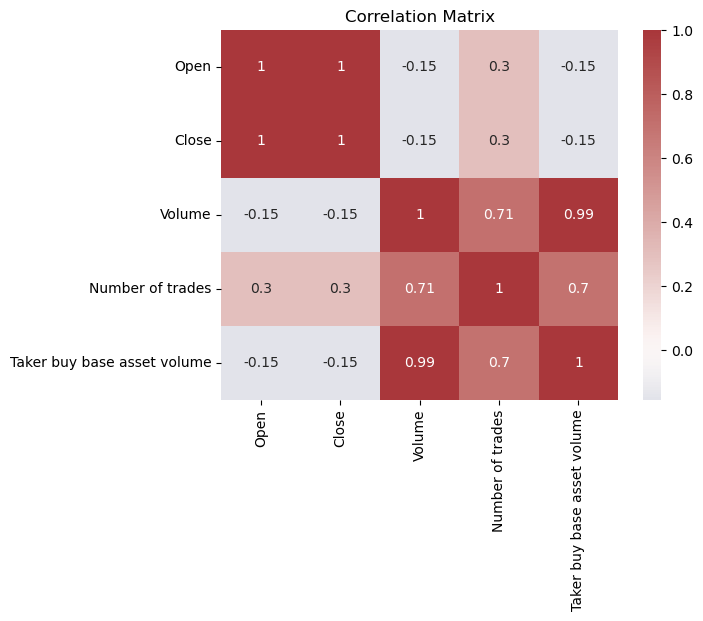

In [85]:
cols = ['Open','Close','Volume','Number of trades','Taker buy base asset volume']
sns.heatmap(df[cols].corr(), annot=True, cmap='vlag', center=0)
plt.title('Correlation Matrix')
plt.show()


**INSIGHTS**
- **Observation:**  
  - **Open & Close** → almost perfectly correlated.  
  - **Volume, Number of Trades, and Taker Buy Volume** → strongly correlated with each other.  
  - **Price vs Volume** → weak correlation.  
- **Interpretation:** While more trades naturally lead to higher volume, **large price swings don’t necessarily require large volumes**. Price movements are often driven by **sentiment and external factors** beyond raw trading activity.  
- **Use Case:** Helps in **feature selection for predictive modeling** and understanding the **interplay between liquidity and price behavior**.  


## 📉 Top 10 Crash Days

- Used `nsmallest` to find the **10 days with the largest negative returns**.  
- Shows the **most extreme daily price drops** in Bitcoin history from the dataset.  
- Helps identify **high-risk periods** and potential triggers for market crashes.  
- Can be used for **risk analysis, strategy testing, or anomaly detection**.


In [86]:
df.nsmallest(10,'return')[['Close','return']]

,Close,return
2018-07-07 06:30:00,6589.93,-0.939041
2019-06-26 20:30:00,11958.77,-0.131720
2020-03-12 10:30:00,6354.88,-0.119169
2020-03-13 01:45:00,4130.64,-0.095911
2023-08-17 21:30:00,25188.01,-0.089797
2020-05-10 00:15:00,8512.46,-0.088677
2019-09-24 19:30:00,7846.93,-0.084094
2021-05-19 13:00:00,32300.46,-0.083275
2019-09-24 18:45:00,8635.95,-0.076913
2020-03-12 23:15:00,5100.02,-0.076199


**INSIGHTS**
- **Observation:** The largest daily drops cluster around the **2018 bear market**, the **March 2020 COVID crash**, and **2023 corrections**.  
- **Interpretation:** Bitcoin remains highly **vulnerable to global shocks** and **sentiment-driven selloffs**, often experiencing steep declines in short periods.  
- **Use Case:** Identifying crash days aids in **stress testing strategies**, understanding **downside risk**, and preparing for **extreme volatility scenarios**.  


## 📈 Top 10 Rally Days

- Used `nlargest` to find the **10 days with the highest positive returns**.  
- Shows the **most extreme daily price gains** in Bitcoin history from the dataset.  
- Helps identify **bullish periods** and potential drivers behind strong market rallies.  
- Useful for **analyzing opportunity windows and understanding market dynamics**.


In [87]:
df.nlargest(10,'return')[['Close','return']]

,Close,return
2018-07-07 06:15:00,108104.01,15.397035
2020-03-13 02:30:00,5188.35,0.226288
2021-05-19 13:30:00,37406.48,0.113227
2018-01-16 22:30:00,9965.00,0.095054
2020-03-13 02:15:00,4230.94,0.089825
2021-01-29 08:45:00,36240.24,0.087337
2019-10-26 01:30:00,10307.96,0.081653
2019-07-18 14:30:00,10199.00,0.080609
2019-06-26 20:45:00,12872.77,0.076429
2018-01-16 22:45:00,10674.38,0.071187


**INSIGHTS**
- **Observation:** The largest daily gains typically occur after **major crashes** (e.g., the **March 2020 recovery**) and during periods of strong market expansion such as the **2021 bull run**.  
- **Interpretation:** Highlights Bitcoin’s tendency for **sharp reversals**, where significant declines are often followed by **equally strong rebounds**, reflecting rapid shifts in market sentiment.  
- **Use Case:** Provides insight into **opportunity windows** for traders and supports risk managers in preparing for **volatile rebound scenarios**.  


## Conclusion  

Through **CryptoScope: Unveiling Bitcoin Trends (2018–2025)**, we:  

-  Identified Bitcoin’s **bull & bear cycles** across years.  
-  Measured **volatility, intraday swings, and seasonality patterns**.  
-  Showed that **volume, trades, and taker activity** are strongly correlated with each other, but only **weakly with price**.  
-  Proved Bitcoin remains a **highly cyclical, volatile, sentiment-driven asset**.  

---

##  Future Scope  

-  Extend analysis to **other cryptocurrencies (ETH, SOL, etc.)** for **cross-market comparison**.  
-  Apply **machine learning models (ARIMA, LSTM)** for **price prediction & volatility forecasting**.  

